In [156]:
import numpy as np # mainly used for numerical operations
import pandas as pd # used for data manipulation and analysis.
from sklearn.preprocessing import StandardScaler # StandardScaler is used to standardize features by removing the mean and scaling to unit variance.
from sklearn.model_selection import train_test_split
from sklearn import svm # SVM is a machine learning algorithm used for classification problems (like predicting diabetes: diabetic vs. not diabetic)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # acuracy score compares the model’s predictions with the actual results and tells you the percentage of correct predictions.
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
csv_file = "diabetes.csv"
diabetes_dataset = pd.read_csv(csv_file)

In [158]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [159]:
diabetes_dataset = diabetes_dataset.reset_index()
diabetes_dataset.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [160]:
diabetes_dataset = diabetes_dataset.drop(['Pregnancies',  'SkinThickness', 'BMI'], axis=1)
diabetes_dataset.head()

,index,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,0,148,72,0,0.627,50,1
1,1,85,66,0,0.351,31,0
2,2,183,64,0,0.672,32,1
3,3,89,66,94,0.167,21,0
4,4,137,40,168,2.288,33,1


In [161]:
diabetes_dataset.shape # no. of rows and columns

(768, 7)

In [162]:
diabetes_dataset.describe() #This function gives you a statistical summary of all numerical columns in your dataset.

,index,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,120.894531,69.105469,79.799479,0.471876,33.240885,0.348958
std,221.846794,31.972618,19.355807,115.244002,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.750000,99.000000,62.000000,0.000000,0.243750,24.000000,0.000000
50%,383.500000,117.000000,72.000000,30.500000,0.372500,29.000000,0.000000
75%,575.250000,140.250000,80.000000,127.250000,0.626250,41.000000,1.000000
max,767.000000,199.000000,122.000000,846.000000,2.420000,81.000000,1.000000


In [163]:
diabetes_dataset['Outcome'].value_counts() #used to count the no. of values in the outcome column

Outcome
0    500
1    268
Name: count, dtype: int64

In [164]:
diabetes_dataset.groupby('Outcome').mean()#average value of each feature for diabetic and non-diabetic people

,index,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age
Outcome,,,,,,
0,390.834000,109.980000,68.184000,68.792000,0.429734,31.190000
1,369.817164,141.257463,70.824627,100.335821,0.550500,37.067164


In [165]:
diabetes_dataset.info() # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 42.1 KB


In [166]:
# Checking for missing values and duplicates
print("Missing values per column:\n", diabetes_dataset.isnull().sum())
print("Number of duplicated rows:", diabetes_dataset.duplicated().sum())

Missing values per column:
 index                       0
Glucose                     0
BloodPressure               0
Insulin                     0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Number of duplicated rows: 0


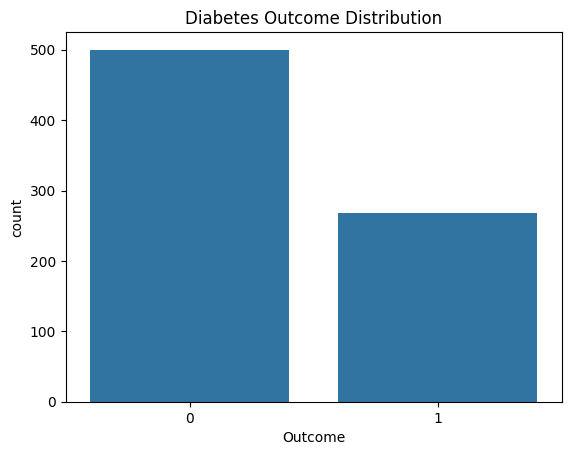

In [167]:
# Distribution of Outcome column
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title("Diabetes Outcome Distribution")
plt.show()

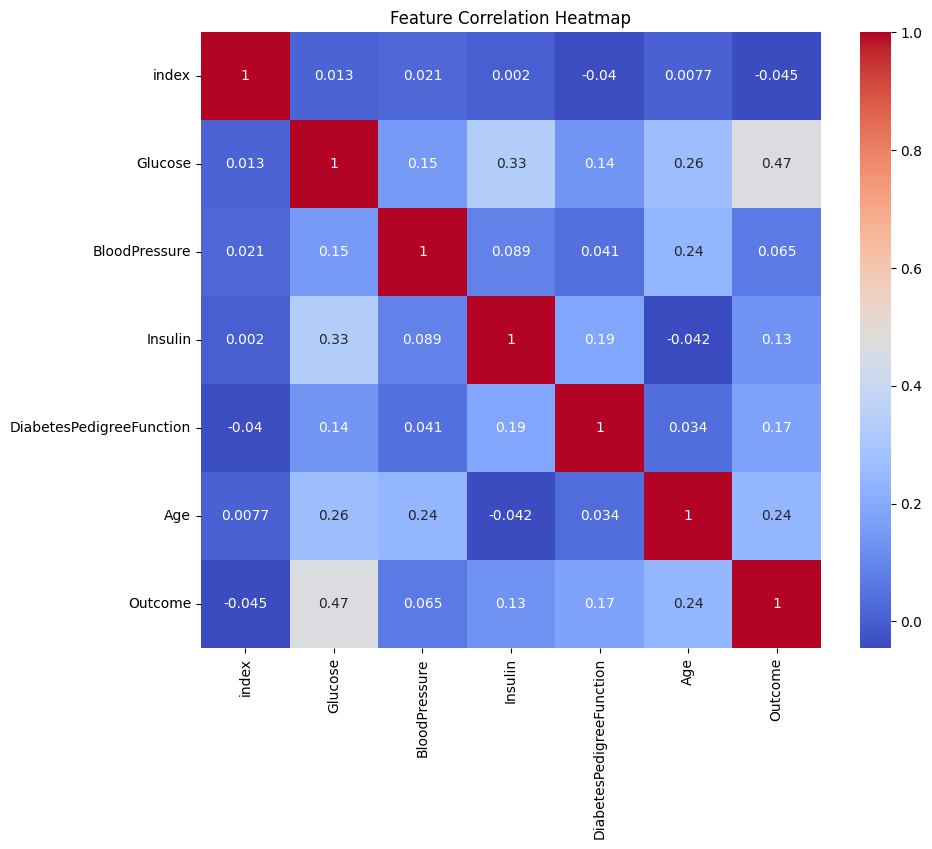

In [168]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [169]:
# Replace 0s with NaNs in specific columns and fill with median
columns_with_zeros = ['Glucose', 'BloodPressure', 'Insulin']
for col in columns_with_zeros:
    diabetes_dataset[col] = diabetes_dataset[col].replace(0, np.nan)

# Fill NaNs with median values
diabetes_dataset = diabetes_dataset.fillna(diabetes_dataset.median())

In [170]:
# Splitting features and target variable
X = diabetes_dataset.drop('Outcome', axis=1)
y = diabetes_dataset['Outcome']

In [171]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train-test split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# train the model

In [173]:
# Model training using SVM
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

# predict and evaluate

In [174]:
# Model prediction and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [175]:
# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[85 15]
 [29 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.79       100
           1       0.62      0.46      0.53        54

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154

